6000.0
Da: 15
r0 kg/m3/s: 4.755865567533291e-15
r0 g/cm3/yr: 1.5e-10

Da: 1700.0
r0 kg/m3/s: 5.38998097653773e-13
r0 g/cm3/yr: 1.7000000000000003e-08

Da: 5000000.0
r0 kg/m3/s: 1.585288522511097e-09
r0 g/cm3/yr: 5e-05

1.5769999999999999e-06


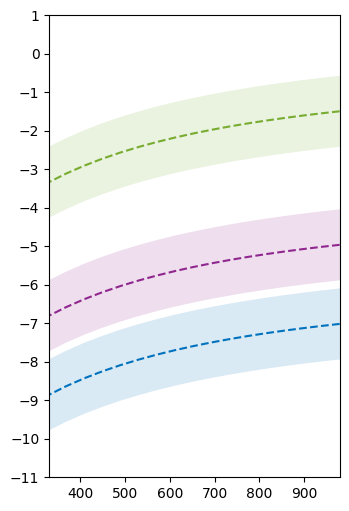

In [10]:
import numpy as np
import matplotlib.pyplot as plt

yr = 3.154e7
mm = 1e-3
km = 1e3

colors = [
    [0, 0.4470, 0.7410],
    "#90278e",
    [0.4660, 0.6740, 0.1880]
]

R = 8.314 # J/mol/K
T = np.linspace(0.,2000.,50) + 273.15 # K
rho0 = 3000. # kg/m3
v0 = 1. * mm / yr # m/s
h0 = 50. * km # m
Tr = 5500+273.15 # = 2000 C

# assume 20 cm2/g following Baxter (2003)
# assume density of 3000 kg/m3
S0_cm2g = 20. # cm2/g
S0_cm = rho0/1000. * (S0_cm2g) # assume density of 3 g/cm3 
S0 = S0_cm * 100. # 6000 /m
print(S0)

Sj = 1 # 1/m
rj = np.exp(-Tr/T)

# currently not used, we are scaling the reaction by volume
M0 = 2630. # kg of albite in unit volume (reference mass)
Mj = 0.263 # kg/mol, mass of 1 mol of albite (mass of the reactants)

def R_net(r0, A):
    # A are given for 1 sq cm, scale it up to sq m
    sqm = 1e4
    R_net= r0*rj*A/(R*(T))*sqm # kg/m2/s
    R_net_gcy = R_net*1e3 / 100**2 * yr # g/cm2/yr
    return R_net_gcy

fig = plt.figure(figsize=[3.75,6])

for i, Da in enumerate([15, 1.7e3, 5e6]):
    col = colors[i]

    r0 = Da*v0*rho0/h0/S0
    print("Da: {}".format(Da))
    print("r0 kg/m3/s: {}".format(r0))
    print("r0 g/cm3/yr: {}\n".format(r0*1e3/100**3 * yr))

    Rj_gcy = R_net(r0,80)
    Rj_gcy2= R_net(r0,5600)
    Rj_gcy3 = R_net(r0,670)

    p=plt.fill_between(T-273.15, np.log10(Rj_gcy), np.log10(Rj_gcy2),color=col,alpha=0.15,linewidth=0)
    plt.plot(T-273.15, np.log10(Rj_gcy3),'--',color=col,linewidth=1.5)

plt.ylim([-11,1])
plt.xlim([330,980])
plt.yticks(np.arange(-11,2,1))
plt.xticks(np.arange(400,1000,100))

# Bras

Rbras = 1e-12 # per second
Rbras_gcy = Rbras * yr / S0_cm2g # g/cm2/yr
print(Rbras_gcy)

plt.savefig("figs/damk.pdf")
